# Simulation of WHERE1 M1 IR-UWB scenario

In the following, all the steps required for going from the description of the radio scene until the calculation of the UWB channel impulse response are described on a simple example.

A ray-tracing simulation is controlled via a configuration file which is stored in the *ini* directory of the project directory.
By default, a default configuration file named **default.ini** is loaded.

In [1]:
from pylayers.measures.mesuwb import *
from pylayers.simul.link import *
#import pylayers.util.pyutil as pyu
#import pylayers.signal.bsignal as bs

%matplotlib inline

A first step consists in loading a layout associated with the simulation.
Here the `WHERE1.ini` layout is chosen along with the corresponding slabs and materials files `matDB.ini` and `slabDB.ini`.

This layout corresponds to the office building where the first WHERE1 UWB measurement campaign has been conducted.

The layout method loads those in a member layout object **L** of the simulation object **S**.

If not already available, the layout associated graphs are built.

In [2]:
L=Layout('WHERE1.ini')

The layout display is fully parameterized via the embedded **display** dictionnary member of the Layout object.which allows to
configure the `showGs()` method behavior.

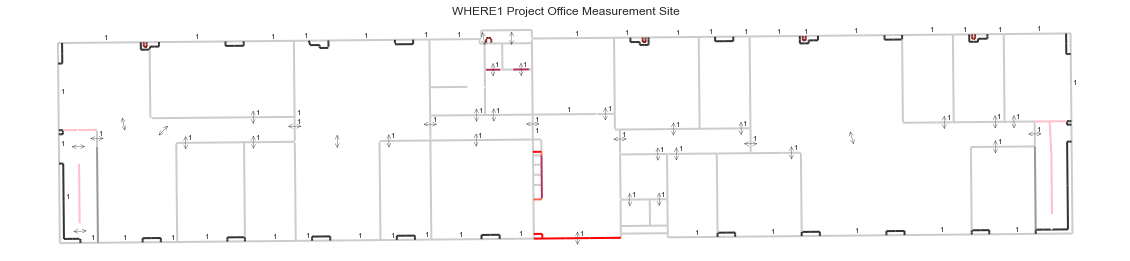

In [3]:
L.display['ednodes']=False
L.display['nodes']=False
L.display['title']='WHERE1 Project Office Measurement Site'
L.display['overlay']=False
fig = plt.figure(figsize=(20,10))
fig,ax=L.showGs(fig=fig)

## Reading the UWB WHERE1 M1 measures

In [4]:
def showM(M):
    f= plt.figure(figsize=(10,6))
    f,a = M.show(fig=f,delay=M.de)
    f,a = L.showG('s',figsize=(10,6))
    a.scatter(M.tx[0],M.tx[1],c='r',s=10,linewidth=0)
    a.scatter(M.rx[1,0],M.rx[1,1],c='k',s=30,linewidth=0)
    a.scatter(M.rx[2,0],M.rx[2,1],c='b',s=30,linewidth=0)
    a.scatter(M.rx[3,0],M.rx[3,1],c='g',s=30,linewidth=0)
    a.scatter(M.rx[4,0],M.rx[4,1],c='c',s=30,linewidth=0)
    a.scatter(M.rx[4,0],M.rx[4,1],c='c',s=10,linewidth=0)

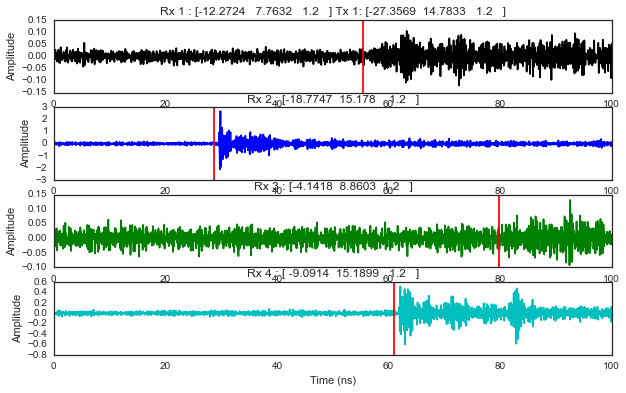

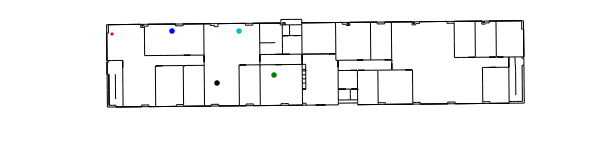

In [5]:
M = UWBMeasure()
showM(M)

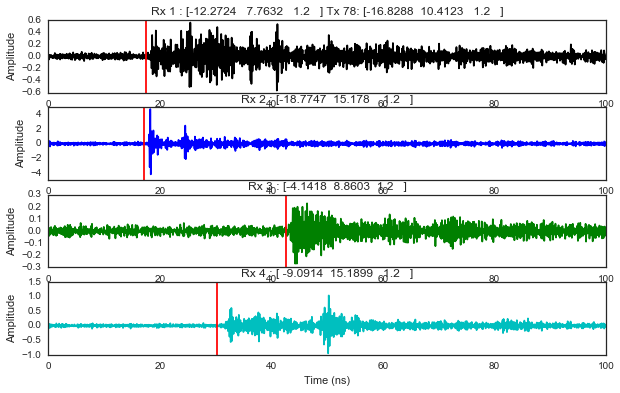

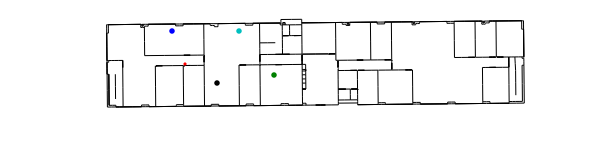

In [6]:
M = UWBMeasure(nTx=78)
showM(M)

In [7]:
M.toa_max(6,display=False)

array([ 0.,  0.,  0.,  0.])

## Adding Coordinates of Transmiting and Receiving points

Coordinates of transmitters and receivers for the simulation are stored in **.ini** files.
The transmitter and the receiver are instances of the class `RadioNode` which offers different methods
for specifying nodes positions.
The stucture of this **.ini** file presented below.
The node Id is associated with the 3 coordinates $x,y,z$ separated by white spaces.

    [coordinates]
    1 = -12.2724 7.76319999993 1.2
    2 = -18.7747 15.1779999998 1.2
    3 = -4.14179999998 8.86029999983 1.2
    4 = -9.09139999998 15.1899000001 1.2

In [8]:
tx = RadioNode(_fileini='w2m1rx.ini',_fileant='defant.vsh3')
rx = RadioNode(_fileini='w2m1tx.ini',_fileant='defant.vsh3')

The whole simulation setup can then be displayed using the **show** method of the Simulation object

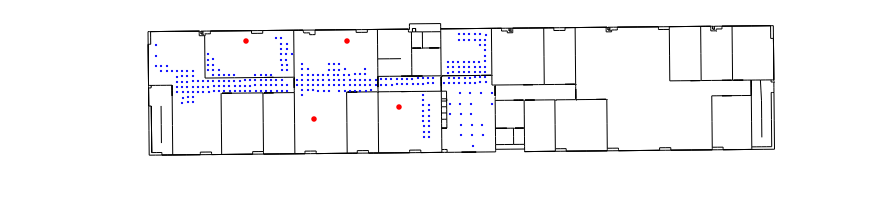

In [9]:
fig = plt.figure(figsize=(15,10))
f,a=L.showG('s',fig=fig)
f,a=tx.show(fig=f,ax=a)
f,a=rx.show(fig=f,ax=a,size=30,color='r')

The different object of the simulation can be accessed to get different information. Below i.e the number of transmitter and receiver points.

In [10]:
print 'number of Tx :',len(tx.points.keys())
print 'number of rx :',len(rx.points.keys())

number of Tx : 302
number of rx : 4


The decomposition of the layout in a set of disjoint cycles is represented below. Not all cycles are rooms.

(-40.0, 40.0, 2.0, 18.0)

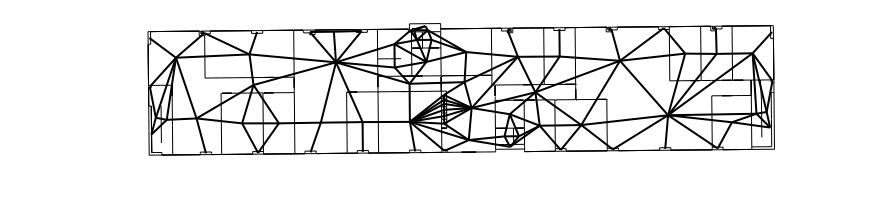

In [11]:
fig =plt.figure(figsize=(15,10))
fig,ax=L.showG('st',fig=fig)
plt.axis('off')

(-40.0, 40.0, 2.0, 18.0)

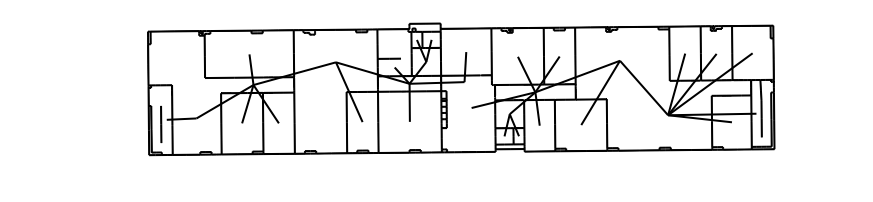

In [12]:
fig,ax=L.showG('sr',figsize=(15,10))
plt.axis('off')

Then an existing interaction is picked up and the neighbors in the graph of interactions $\mathcal{G}_i$ are shown

Then a selected sequence of interactions is chosen and the attribute `output` of the corresponding edge is shown. The result is the set of possible next interactions. Notice that with each of these potential output interactions is associated a number $0<\alpha \le 1$
which indicates the probability of the corresponding sequence with respect of the full range of incidence angles. This value is not fully exploited yet in the algorithm which seek for [`Signatures`](http://pylayers.github.io/pylayers/modules/pylayers.antprop.signature.html)

## Signatures, rays, propagation and transmission channel

In [13]:
# Choose Tx and Rx coordinates
itx=10
irx=2
tx= tx.points[itx]
rx= rx.points[irx]

Coordinates of the transmitter

In [14]:
tx

array([-24.867 ,  12.3097,   1.2   ])

Coordinates of the receiver

In [15]:
rx

array([-18.7747,  15.178 ,   1.2   ])

The `__repr__` of a signature object provides information about the number of signatures for each set with same number of interactions.

In [16]:
DL=DLink(L=L,fGHz=np.linspace(2, 11, 181, endpoint=True))
DL.a= tx
DL.b= rx
#y = DL.eval(force=['sig','ray','Ct','H'],alg=2015,si_reverb=2,cutoff=2,ra_vectorized=True)
y = DL.eval(alg=2015,si_reverb=2,cutoff=2,ra_vectorized=True,force=True)

checkh5
Start Signatures
algo 2015
Stop signature 0.169198036194
Signatures'> from 6_5_2 saved
Start Rays
Rays'> from 2_0_1 saved
Stop rays 0.166086912155
Ctilde'> from 0_1_0 saved
Tchannel'> from 0_1_0_0_0_0_0 saved


In [19]:
DL.fGHz

array([  2.  ,   2.05,   2.1 ,   2.15,   2.2 ,   2.25,   2.3 ,   2.35,
         2.4 ,   2.45,   2.5 ,   2.55,   2.6 ,   2.65,   2.7 ,   2.75,
         2.8 ,   2.85,   2.9 ,   2.95,   3.  ,   3.05,   3.1 ,   3.15,
         3.2 ,   3.25,   3.3 ,   3.35,   3.4 ,   3.45,   3.5 ,   3.55,
         3.6 ,   3.65,   3.7 ,   3.75,   3.8 ,   3.85,   3.9 ,   3.95,
         4.  ,   4.05,   4.1 ,   4.15,   4.2 ,   4.25,   4.3 ,   4.35,
         4.4 ,   4.45,   4.5 ,   4.55,   4.6 ,   4.65,   4.7 ,   4.75,
         4.8 ,   4.85,   4.9 ,   4.95,   5.  ,   5.05,   5.1 ,   5.15,
         5.2 ,   5.25,   5.3 ,   5.35,   5.4 ,   5.45,   5.5 ,   5.55,
         5.6 ,   5.65,   5.7 ,   5.75,   5.8 ,   5.85,   5.9 ,   5.95,
         6.  ,   6.05,   6.1 ,   6.15,   6.2 ,   6.25,   6.3 ,   6.35,
         6.4 ,   6.45,   6.5 ,   6.55,   6.6 ,   6.65,   6.7 ,   6.75,
         6.8 ,   6.85,   6.9 ,   6.95,   7.  ,   7.05,   7.1 ,   7.15,
         7.2 ,   7.25,   7.3 ,   7.35,   7.4 ,   7.45,   7.5 ,   7.55,
      

In [21]:
DL.C.Ctt.x

array([  2.  ,   2.05,   2.1 ,   2.15,   2.2 ,   2.25,   2.3 ,   2.35,
         2.4 ,   2.45,   2.5 ,   2.55,   2.6 ,   2.65,   2.7 ,   2.75,
         2.8 ,   2.85,   2.9 ,   2.95,   3.  ,   3.05,   3.1 ,   3.15,
         3.2 ,   3.25,   3.3 ,   3.35,   3.4 ,   3.45,   3.5 ,   3.55,
         3.6 ,   3.65,   3.7 ,   3.75,   3.8 ,   3.85,   3.9 ,   3.95,
         4.  ,   4.05,   4.1 ,   4.15,   4.2 ,   4.25,   4.3 ,   4.35,
         4.4 ,   4.45,   4.5 ,   4.55,   4.6 ,   4.65,   4.7 ,   4.75,
         4.8 ,   4.85,   4.9 ,   4.95,   5.  ,   5.05,   5.1 ,   5.15,
         5.2 ,   5.25,   5.3 ,   5.35,   5.4 ,   5.45,   5.5 ,   5.55,
         5.6 ,   5.65,   5.7 ,   5.75,   5.8 ,   5.85,   5.9 ,   5.95,
         6.  ,   6.05,   6.1 ,   6.15,   6.2 ,   6.25,   6.3 ,   6.35,
         6.4 ,   6.45,   6.5 ,   6.55,   6.6 ,   6.65,   6.7 ,   6.75,
         6.8 ,   6.85,   6.9 ,   6.95,   7.  ,   7.05,   7.1 ,   7.15,
         7.2 ,   7.25,   7.3 ,   7.35,   7.4 ,   7.45,   7.5 ,   7.55,
      

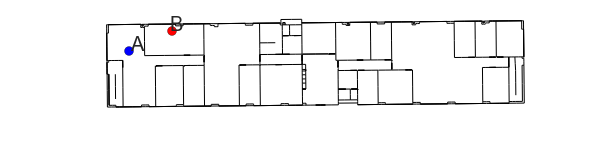

In [24]:
f,a=DL.show(figsize=(10,8))

## Calculating the Propagation Channel

In [25]:
print "fmin : ",DL.fGHz.min()
print "fmax : ",DL.fGHz.max()
print "Nf : ", len(DL.fGHz)

fmin :  2.0
fmax :  11.0
Nf :  181


The energy on each polarization couple of the channel can be obtained with the [`energy`](http://pylayers.github.io/pylayers/modules/generated/pylayers.antprop.channel.Ctilde.energy.html) method. By default this method scales the channel with the Friis factor $\frac{c}{4\pi f}$.

In [26]:
type(DL.C)

pylayers.antprop.channel.Ctilde

In [27]:
Ectt,Ecpp,Ectp,Ecpt = DL.C.energy(Friis=True)

In [28]:
Eco = Ectt+Ecpp
Ecross = Ectp+Ecpt

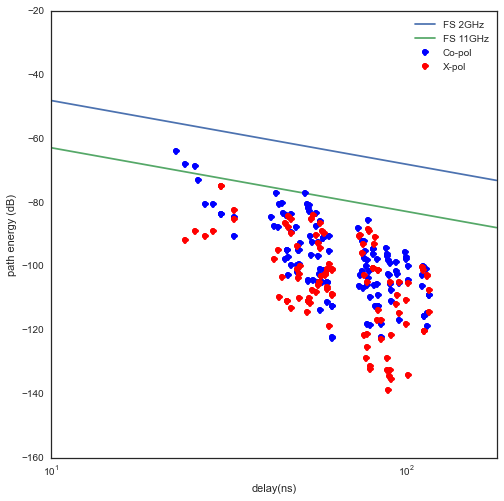

In [29]:
tauns = np.arange(10,180,1)
PL2 = 32.4+20*np.log10(2)+20*np.log10(0.3*tauns)
PL11 = 32.4+20*np.log10(11)+20*np.log10(0.3*tauns)
fig = plt.figure(figsize=(8,8))
plt.semilogx(tauns,-PL2)
plt.semilogx(tauns,-PL11)
plt.semilogx(DL.C.tauk,10*np.log10(Eco),'ob')
plt.semilogx(DL.C.tauk,10*np.log10(Ecross),'or')
plt.xlabel('delay(ns)')
plt.ylabel('path energy (dB)')
plt.legend(('FS 2GHz','FS 11GHz','Co-pol','X-pol'))
axis = plt.axis((0,180,-160,-20))

The multipath doa/dod diagram can be obtained via the method [`doadod`](http://pylayers.github.io/pylayers/modules/generated/pylayers.antprop.channel.Ctilde.doadod.html). The colorbar corresponds to the total energy of the path.

(<matplotlib.figure.Figure at 0x7f0ef2249e90>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f0ef4eb28d0>])

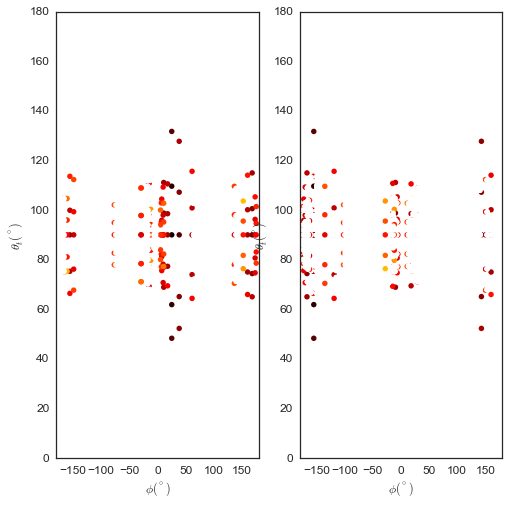

In [30]:
fig = plt.figure(figsize=(8,8))
DL.C.doadod(phi=(-180,180),fig=fig)

In [31]:
DL.C.info()

Nfreq  : 181
Nray : 1055
shape Ctt : (1055, 181)
shape Ctp : (1055, 181)
shape Cpt : (1055, 181)
shape Cpp : (1055, 181)


## Applying a  waveform to the transmission channel

Once the propagation channel is obtained the transmission channel is calculated with the method [`prop2tran`](http://pylayers.github.io/pylayers/modules/generated/pylayers.antprop.channel.Ctilde.prop2tran.html). The Friis factor has to be set to False.

In [32]:
DL.C.tangl

array([[ 1.57079633,  0.44002201],
       [ 1.91317378,  0.44002201],
       [ 1.07983694,  0.44002201],
       ..., 
       [ 1.37632051, -2.9215061 ],
       [ 1.72048045, -0.06091943],
       [ 1.42111221, -0.06091943]])

In [43]:
Aa = Antenna('Omni',param={'pol':'t','GmaxdB':0},fGHz=DL.fGHz)
Ab = Antenna('Omni',param={'pol':'t','GmaxdB':0},fGHZ=DL.fGHz)
sco = DL.C.prop2tran(a=Aa,b=Ab,Friis=False)

In [44]:
sco.x

array([  2.  ,   2.05,   2.1 ,   2.15,   2.2 ,   2.25,   2.3 ,   2.35,
         2.4 ,   2.45,   2.5 ,   2.55,   2.6 ,   2.65,   2.7 ,   2.75,
         2.8 ,   2.85,   2.9 ,   2.95,   3.  ,   3.05,   3.1 ,   3.15,
         3.2 ,   3.25,   3.3 ,   3.35,   3.4 ,   3.45,   3.5 ,   3.55,
         3.6 ,   3.65,   3.7 ,   3.75,   3.8 ,   3.85,   3.9 ,   3.95,
         4.  ,   4.05,   4.1 ,   4.15,   4.2 ,   4.25,   4.3 ,   4.35,
         4.4 ,   4.45,   4.5 ,   4.55,   4.6 ,   4.65,   4.7 ,   4.75,
         4.8 ,   4.85,   4.9 ,   4.95,   5.  ,   5.05,   5.1 ,   5.15,
         5.2 ,   5.25,   5.3 ,   5.35,   5.4 ,   5.45,   5.5 ,   5.55,
         5.6 ,   5.65,   5.7 ,   5.75,   5.8 ,   5.85,   5.9 ,   5.95,
         6.  ,   6.05,   6.1 ,   6.15,   6.2 ,   6.25,   6.3 ,   6.35,
         6.4 ,   6.45,   6.5 ,   6.55,   6.6 ,   6.65,   6.7 ,   6.75,
         6.8 ,   6.85,   6.9 ,   6.95,   7.  ,   7.05,   7.1 ,   7.15,
         7.2 ,   7.25,   7.3 ,   7.35,   7.4 ,   7.45,   7.5 ,   7.55,
      

In [45]:
DL.Aa.fGHz

array([ 0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,  5.4 ,  5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,
        5.75,  5.8 ,  5.85,  5.9 ,  5.95])

In [46]:
# Apply antenna rotation matices
DL.C.locbas(Tt=DL.Ta,Tr=DL.Tb)

> /home/uguen/Documents/rch/devel/pylayers/pylayers/antprop/channel.py(3568)locbas()
-> self.Ctt = bs.FUsignal(fGHz, Cttl)
(Pdb) fGHz
array([  2.  ,   2.05,   2.1 ,   2.15,   2.2 ,   2.25,   2.3 ,   2.35,
         2.4 ,   2.45,   2.5 ,   2.55,   2.6 ,   2.65,   2.7 ,   2.75,
         2.8 ,   2.85,   2.9 ,   2.95,   3.  ,   3.05,   3.1 ,   3.15,
         3.2 ,   3.25,   3.3 ,   3.35,   3.4 ,   3.45,   3.5 ,   3.55,
         3.6 ,   3.65,   3.7 ,   3.75,   3.8 ,   3.85,   3.9 ,   3.95,
         4.  ,   4.05,   4.1 ,   4.15,   4.2 ,   4.25,   4.3 ,   4.35,
         4.4 ,   4.45,   4.5 ,   4.55,   4.6 ,   4.65,   4.7 ,   4.75,
         4.8 ,   4.85,   4.9 ,   4.95,   5.  ,   5.05,   5.1 ,   5.15,
         5.2 ,   5.25,   5.3 ,   5.35,   5.4 ,   5.45,   5.5 ,   5.55,
         5.6 ,   5.65,   5.7 ,   5.75,   5.8 ,   5.85,   5.9 ,   5.95,
         6.  ,   6.05,   6.1 ,   6.15,   6.2 ,   6.25,   6.3 ,   6.35,
         6.4 ,   6.45,   6.5 ,   6.55,   6.6 ,   6.65,   6.7 ,   6.75,
         6.8 ,

Ctilde
---------
(1055, 181)
Nray : 1055
fmin(GHz) : 2.0
fmax(GHz): 11.0
Nfreq : 181

In [47]:
sca = DL.C.prop2tran(a=DL.Aa,b=DL.Ab,Friis=False)

(<matplotlib.figure.Figure at 0x7f0ef3ba6cd0>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ef3bbe310>]], dtype=object))

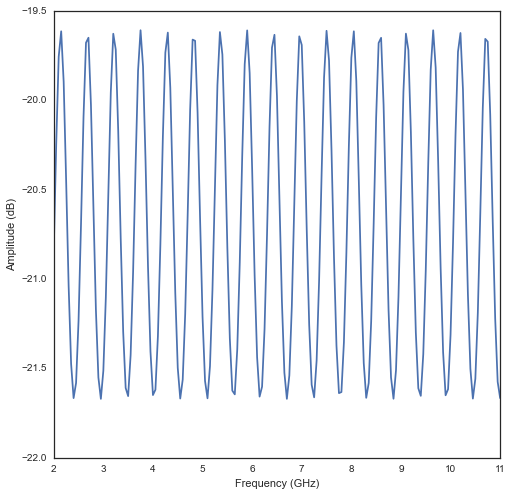

In [51]:
sco.plot()

The applied waveform which is here loaded from a measurement file, and compensated for a small time shift.
It is important for the latter treatment for the applied waveform to be centered in the middle of the array as it is illustrated below.

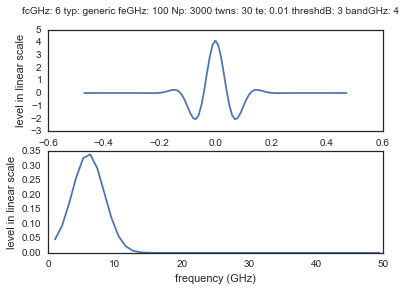

In [52]:
wav1 = wvf.Waveform(typ='generic',fcGHz=6,bandGHz=4)
wav1.show()

Finally, the received UWB waveform can be synthesized in applying the waveform to the transmission channel.

In [53]:
ro = sco.applywavB(wav1.sfg)
ra = sca.applywavB(wav1.sfg)

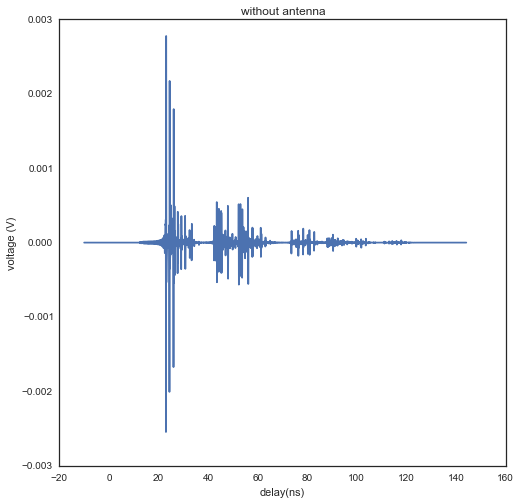

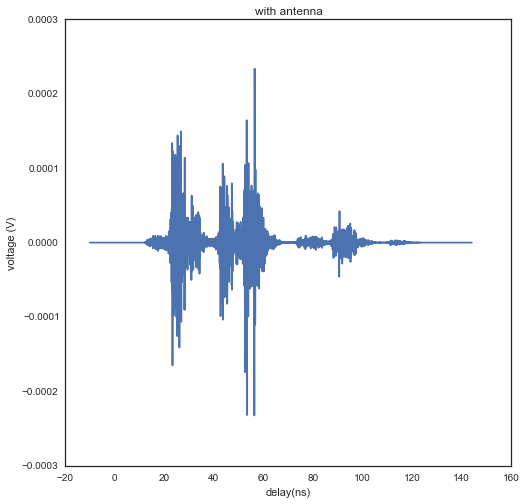

In [54]:
ro.plot(typ=['v'])
plt.xlabel('delay(ns)')
plt.ylabel('voltage (V)')
plt.title('without antenna')
#plt.axis((0,180,-0.006,0.006))

ra.plot(typ=['v'])
plt.xlabel('delay(ns)')
plt.ylabel('voltage (V)')
plt.title('with antenna')
#plt.axis((0,180,-0.1,0.1))

## Comparison with measurement

In [55]:
#dchan={i:'ch'+str(i) for i in range(1,5)}
dchan={}
dchan[1]='ch3'
dchan[2]='ch4'
dchan[3]='ch1'
dchan[4]='ch2'

mapping is a dictionnary with as keys the point index a

NameError: name 'cira' is not defined

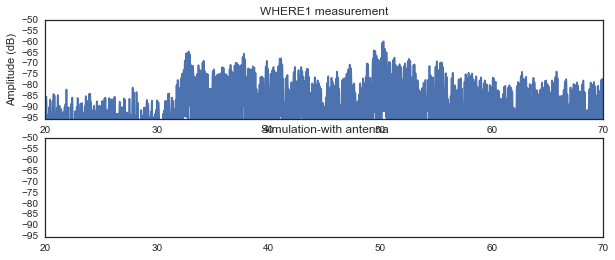

In [56]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(311,title="Measurements")
cmd='M.tdd.' + str(dchan[irx]) + '.plot(ax=ax1)'
eval(cmd)
plt.title('WHERE1 measurement')
#M.tdd.ch2.plot()
# align for plotting
#ciro.x=ciro.x-ciro.x[0]
ax2 = fig.add_subplot(312,title="Simulation-with antenna",sharex=ax1, sharey=ax1)
plt.xlim(20,70)
plt.ylim(-95,-50)
u = cira.plot(ax=ax2)
plt.title('Simulation-with antenna - without noise')
plt.tight_layout()
#ax3 = fig.add_subplot(313,title="Simulation-without antenna",sharex=ax1, sharey=ax1)
#ciro.plot()